# TODO:
### NOW:
- ~~enforce output format for gemini~~
- llama, gpt, ~~claude~~
   - send concurrent calls to all models at once
- ~~add evaluation if there is a golden set for individual model~~
- aggregation strategy
   - multiclass classification: 
      - ~~majority vote~~, add tie breaking strategy
      - ~~baysian approach with GT~~
      - provide X labeles per class
- evaluate
   - bug in glad evaluation. make sure the labels are int
- repeat the same thing for multi-label/ner

### LATER:
- secret management
- ~~update readme~~
- add images



### nice things to do:
- add tqdm to asyncio calls
- ~~proper logging~~

# Annotate

In [ ]:
from utils import Annotate
from datasets import load_set

seed =42

In [ ]:
gemini_prompt_template = """
<data_description>
{description}
</data_description>
-----------

<context>
{datapoint}
</context>
------------

<labels>
{labels}
</labels>
------------

INSTRUCTION:
- familirize yourself with the data using data_description
- read the context carefully. this is the data point you need to label.
- take your time and label the dadatapoint with the most appropriate option using the provided labels.
- return the result as a single label from the <labels>. Don't provide explanations
"""

In [ ]:
dataset = load_dataset("yelp_polarity", split="train") # https://huggingface.co/datasets/yelp_polarity

# take a small sample for dev purposes
dataset_sample = dataset.shuffle(seed=seed).select(range(100))

# user provided data description
DESCRIPTION = """
This is a dataset for binary sentiment classification.
It contains highly polar yelp reviews.
Negative polarity is class 0, and positive class 1.
"""

LABEL_SET = [0, 1] 

In [ ]:
prompt = [gemini_prompt_template.format(description= DESCRIPTION,
                                        datapoint=x,
                                        labels=LABEL_SET) for x in dataset_sample["text"][:20]]
print(len(prompt))

In [ ]:
ann = Annotate()

VALID_MODELS = ["gemini", "claude"]

In [ ]:
d = {}
for m in VALID_MODELS:
    d[m] = await ann.classification(prompt, model=m)

In [ ]:
import json
with open("./data/output/20_sample.json", "w") as json_file:
    json.dump(d, json_file, indent=4)

In [ ]:
# all_results = [d["gemini"], d["claude"]]


## Aggregate

In [ ]:
y_labels = ["gemini", "claude", "fake"]
all_results = [[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]]

In [ ]:
from utils import Aggregate

In [ ]:
agg = Aggregate()

In [ ]:
agg._get_majority_vote(all_results)

In [ ]:
agg._glad(all_results)

## evaluate

In [1]:
y_labels = ["gemini", "claude", "fake"]
all_results = [[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]]

In [2]:
from utils import Evaluate

eval = Evaluate()

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
[1. 1. 1.] [[1 1 0]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [0 0 0]]
[1. 1. 1.] [[1 1 0]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [0 0 0]]
[1. 1. 1.] [[1 1 0]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [0 0 0]]
[1. 1. 1.] [[1 1 0]
 [0 0 0]
 [0 0 1]
 [1 1 1]
 [1 1 0]
 [1 1 0]
 [1 1 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [0 0 0]
 [1 1 0]
 [1 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 0]
 [1 1 1]
 [0 0 1]
 [0 0 0]]
[1. 1. 1.] 

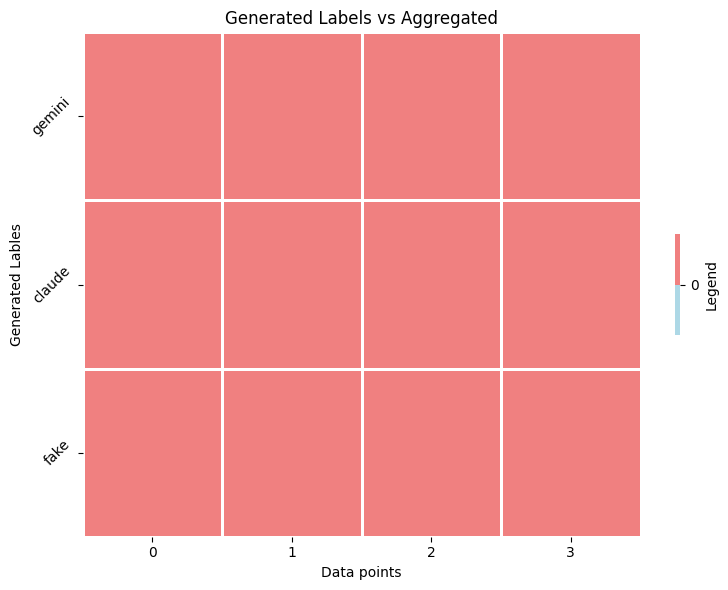

[[False, False, False, False],
 [False, False, False, False],
 [False, False, False, False]]

In [4]:
eval.classification(all_results, strategy="glad", visualize=True, y_labels=y_labels)

# Dev

In [ ]:
y_labels = ["gemini", "claude", "fake"]
all_results = [[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]]


# list(map(list, zip(*all_results))) 
# # task, labeler, label
# result = [(j, i, sublist[i]) 
#           for j, sublist in enumerate(all_results) 
#           for i in range(len(sublist))]

In [ ]:
output = main()

In [ ]:
output['labels']